# Model Regularization in Practice, an example with Keras and TensorFlow 2.0

This is a notebook for the medium article [Model Regularization in Practice, an example with Keras and TensorFlow 2.0](https://medium.com/@bindiatwork/machine-learning-model-regularization-in-practice-an-example-with-keras-and-tensorflow-2-0-52a96746123e)

Please check out article for instructions

**License**: [BSD 2-Clause](https://opensource.org/licenses/BSD-2-Clause)

**tf.keras.regularizers.Regularizer**

*Regularizer base class.*

Regularizers allow you to apply penalties on layer parameters or layer activity during optimization. These penalties are summed into the loss function that the network optimizes.

Regularization penalties are applied on a per-layer basis. The exact API will depend on the layer, but many layers (e.g. Dense, Conv1D, Conv2D and Conv3D) have a unified API.

These layers expose 3 keyword arguments:

**kernel_regularizer:** Regularizer to apply a penalty on the layer's kernel

**bias_regularizer:** Regularizer to apply a penalty on the layer's bias

**activity_regularizer:** Regularizer to apply a penalty on the layer's output

**Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped out” randomly. This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass, and any weight updates are not applied to the neuron on the backward pass.**

**“Dilution (also called Dropout or DropConnect) is a regularization technique for reducing overfitting in artificial neural networks by preventing complex co-adaptations on training data. It is an efficient way of performing model averaging with neural networks.”**

**The Mechanics of Dropout**

Dropout is a computationally cheap and effective technique used to reduce overfitting in neural networks. The technique works by randomly dropping out selected neurons during the training phase. Neurons in later layers do not reap the contribution of dropped-out neurons during forward propagation, nor will updates be made to the dropped-out neurons during backpropagation.

“By dropping a unit out, we mean temporarily removing it from the network, along with all its incoming and outgoing connections”



In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()

## Exploring data

In [2]:
# Load data into a DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Convert datatype to float
df = df.astype(float)
# append "target" and name it "label"
df['label'] = iris.target
# Use string label instead
df['label'] = df.label.replace(dict(enumerate(iris.target_names)))

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Preparing data for Keras and TensorFlow

In [3]:
# label -> one-hot encoding
label = pd.get_dummies(df['label'], prefix='label')
df = pd.concat([df, label], axis=1)
# drop old label
df.drop(['label'], axis=1, inplace=True)

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label_setosa,label_versicolor,label_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [5]:
# Creating X and y

X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
# Convert DataFrame into np array
X = np.asarray(X)

y = df[['label_setosa', 'label_versicolor', 'label_virginica']]
# Convert DataFrame into np array
y = np.asarray(y)

In [6]:
# Split the data set in a training set (80%) and a test set (20%)
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.20
)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120, 3)
(30, 3)


## 1. Build an unregularized neural network model

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(4,)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(3, activation='softmax'),
    ])
    return model

In [8]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 64)                4

### Compile the model


In [9]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

### Fit the model to the training data

In [10]:
history = model.fit(
    X_train,
    y_train,
    epochs=200,
    validation_split=0.25,
    batch_size=40,
    verbose=2
)

Epoch 1/200
3/3 - 2s - loss: 1.0732 - accuracy: 0.3000 - val_loss: 0.9694 - val_accuracy: 0.4000 - 2s/epoch - 635ms/step
Epoch 2/200
3/3 - 0s - loss: 0.9859 - accuracy: 0.4556 - val_loss: 0.9065 - val_accuracy: 0.7000 - 44ms/epoch - 15ms/step
Epoch 3/200
3/3 - 0s - loss: 0.9169 - accuracy: 0.5889 - val_loss: 0.8118 - val_accuracy: 0.7000 - 59ms/epoch - 20ms/step
Epoch 4/200
3/3 - 0s - loss: 0.8247 - accuracy: 0.6667 - val_loss: 0.7392 - val_accuracy: 0.9667 - 42ms/epoch - 14ms/step
Epoch 5/200
3/3 - 0s - loss: 0.7246 - accuracy: 0.9667 - val_loss: 0.6344 - val_accuracy: 0.9667 - 43ms/epoch - 14ms/step
Epoch 6/200
3/3 - 0s - loss: 0.6072 - accuracy: 0.9556 - val_loss: 0.5362 - val_accuracy: 0.8667 - 40ms/epoch - 13ms/step
Epoch 7/200
3/3 - 0s - loss: 0.4918 - accuracy: 0.8778 - val_loss: 0.4414 - val_accuracy: 0.8667 - 40ms/epoch - 13ms/step
Epoch 8/200
3/3 - 0s - loss: 0.3805 - accuracy: 0.9444 - val_loss: 0.3147 - val_accuracy: 0.9667 - 48ms/epoch - 16ms/step
Epoch 9/200
3/3 - 0s - lo

### Model Evaluation

In [11]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

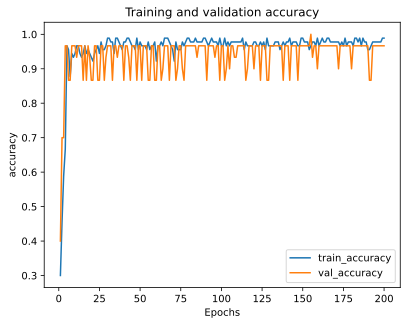

In [12]:
plot_metric(history, 'accuracy')

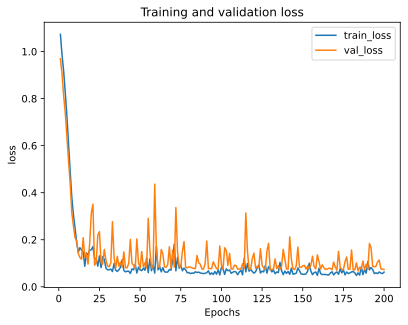

In [13]:
plot_metric(history, 'loss')

Plot the training and validation loss

Finally, let's plot the loss vs. epochs graph on the training and validation sets

From the graph, we can see that the model has vastly overfit the training data, so it outperform the validation set


In [14]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test, verbose=2)

1/1 - 0s - loss: 0.0625 - accuracy: 0.9667 - 23ms/epoch - 23ms/step


[0.06253813207149506, 0.9666666388511658]

## 2. Adding L2 regularization and Dropout

In [15]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

def create_regularized_model(factor, rate):
    model = Sequential([
        Dense(64, kernel_regularizer=l2(factor), activation="relu", input_shape=(4,)),
        Dropout(rate),
        Dense(128, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(64, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(64, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(64, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(3, activation='softmax')
    ])
    return model

In [17]:
1 * 10**-5

1e-05

In [23]:
1e-5 == 0.00001

True

In [21]:
# Re-build the model with weight decay and dropout layers
model = create_regularized_model(1e-5, 0.3)

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                320       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 128)              

In [24]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [25]:
# Train the model, with some of the data reserved for validation
history = model.fit(
    X_train,
    y_train,
    epochs=200,
    validation_split=0.25,
    batch_size=40,
    verbose=2
)

Epoch 1/200
3/3 - 2s - loss: 1.2415 - accuracy: 0.2111 - val_loss: 1.0870 - val_accuracy: 0.4000 - 2s/epoch - 813ms/step
Epoch 2/200
3/3 - 0s - loss: 1.1440 - accuracy: 0.3222 - val_loss: 1.0854 - val_accuracy: 0.4000 - 55ms/epoch - 18ms/step
Epoch 3/200
3/3 - 0s - loss: 1.1734 - accuracy: 0.3000 - val_loss: 1.0908 - val_accuracy: 0.4000 - 52ms/epoch - 17ms/step
Epoch 4/200
3/3 - 0s - loss: 1.1050 - accuracy: 0.3889 - val_loss: 1.0881 - val_accuracy: 0.3667 - 54ms/epoch - 18ms/step
Epoch 5/200
3/3 - 0s - loss: 1.0938 - accuracy: 0.3667 - val_loss: 1.0868 - val_accuracy: 0.6667 - 55ms/epoch - 18ms/step
Epoch 6/200
3/3 - 0s - loss: 1.1186 - accuracy: 0.3556 - val_loss: 1.0921 - val_accuracy: 0.6000 - 56ms/epoch - 19ms/step
Epoch 7/200
3/3 - 0s - loss: 1.0903 - accuracy: 0.3778 - val_loss: 1.0947 - val_accuracy: 0.3000 - 55ms/epoch - 18ms/step
Epoch 8/200
3/3 - 0s - loss: 1.1004 - accuracy: 0.3556 - val_loss: 1.0986 - val_accuracy: 0.3000 - 56ms/epoch - 19ms/step
Epoch 9/200
3/3 - 0s - lo

### Plot the learning curves

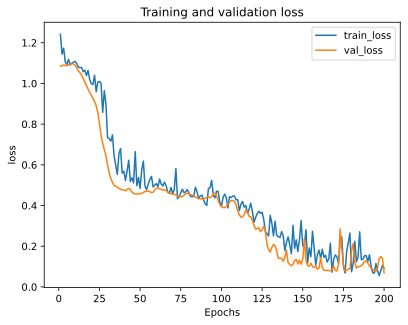

In [26]:
plot_metric(history, 'loss')

Here, you can see that the overfitting is not completely fixed, but there is a signficant improvement when we compare it to the unregularized model

In [27]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test, verbose=2)

1/1 - 0s - loss: 0.0500 - accuracy: 0.9667 - 21ms/epoch - 21ms/step


[0.05001683533191681, 0.9666666388511658]

## That's it

Thanks for reading

This is a notebook for the medium article [Model Regularization in Practice, an example with Keras and TensorFlow 2.0](https://medium.com/@bindiatwork/machine-learning-model-regularization-in-practice-an-example-with-keras-and-tensorflow-2-0-52a96746123e)

Please check out article for instructions

**Q1. What is the use of keras regularization?**

Answer: It is the technique for preventing the model from large weights. The regularization category is applied to the per-layer basis.


**Q2. How many types of weight regularization are in keras?**

Answer: Basically there are multiple types of weight regularization like vector norms, L1 and L2. It will require the hyper parameter which is configured.

**Q3. Which modules do we need to import at the time of using keras regularization?**

Answer: We need to import the keras and tensorflow module at the time of using it. Also, we need to import is a dense layer.

**Conclusion:-**

**There are two popular keras regularization parameters available i.e. L1 and L2. In that L1 is nothing but the Lasso and L2 is called Ridge. It allows us to apply the penalties to the parameters of layer activities at the time of optimization.**

--------------**KERAS REGULAZIATION----------------**

Keras regularization allows us to apply the penalties in the parameters of layer activities at the optimization time. Those penalties were summed into the function of loss, and it will optimize the network. It applies on a per-layer basis. The exact API depends on the layer, but multiple layers contain a unified API. The layer will expose arguments of 3 keywords.

The keras regularization prevents the over-fitting penalizing model from containing large weights. There are two popular parameters available, i.e., L1 and L2. L1 is nothing but the Lasso, and L2 is called Ridge. Both of these parameters are defined at the time of learning the linear regression. When working with tensorflow, we can implement the regularization using an optimizer. We are adding regularization to our code by adding a parameter name as kernel_regularizer. While adding L2 regularization, we need to pass the keras regularizers.l2 () function.

This function takes one parameter, which contains the strength of regularization. We pass L1 regularizers by replacing the l2 function with the l1 function. Suppose we need to use L2 and l1 regularization this is called the elastic net. The weight regularization provides an approach to reducing the overfitting of neural network models for deep learning. Activity regularization encourages the neural network to learn the sparse features of internal representations for the raw observations. It is common to seek the representation of spark known for autoencoders called sparse encoders.

python -m pip install tensorflow

python –m pip install keras

import tensorflow as tf

from keras.layers import Dense

from sklearn.datasets import make_circles

from keras.layers import Dense

from keras.models import Sequential

from keras.regularizers import l1

from keras.layers import Activation

In [37]:
import tensorflow as tf

from keras.layers import Dense

from sklearn.datasets import make_circles

from keras.layers import Dense

from keras.models import Sequential

from keras.regularizers import l1

from keras.layers import Activation

In [45]:
X, y = make_circles(n_samples=60)


In [39]:
X.shape, y.shape

((60, 2), (60,))

In [40]:
train = 25
X_train, X_test = X[:train, :], X[train:, :]
y_train, y_test = y[:train], y[train:]

X_train.shape, X_test.shape

((25, 2), (35, 2))

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(2,)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(3, activation='softmax'),
    ])
    return model




In [50]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [51]:
# Train the model, with some of the data reserved for validation
history = model.fit(
    X_train,
    y_train,
    epochs=200,
    validation_split=0.25,
    batch_size=40,
    verbose=2
)

Epoch 1/200
1/1 - 1s - loss: 4.8389 - accuracy: 0.6111 - val_loss: 6.3754 - val_accuracy: 0.5714 - 900ms/epoch - 900ms/step
Epoch 2/200
1/1 - 0s - loss: 4.4364 - accuracy: 0.5556 - val_loss: 6.2726 - val_accuracy: 0.5714 - 33ms/epoch - 33ms/step
Epoch 3/200
1/1 - 0s - loss: 3.9953 - accuracy: 0.5000 - val_loss: 6.2167 - val_accuracy: 0.5714 - 39ms/epoch - 39ms/step
Epoch 4/200
1/1 - 0s - loss: 3.3842 - accuracy: 0.5556 - val_loss: 4.6478 - val_accuracy: 0.7143 - 50ms/epoch - 50ms/step
Epoch 5/200
1/1 - 0s - loss: 3.2310 - accuracy: 0.5556 - val_loss: 4.4870 - val_accuracy: 0.5714 - 32ms/epoch - 32ms/step
Epoch 6/200
1/1 - 0s - loss: 2.5404 - accuracy: 0.5000 - val_loss: 4.3960 - val_accuracy: 0.5714 - 37ms/epoch - 37ms/step
Epoch 7/200
1/1 - 0s - loss: 2.1553 - accuracy: 0.5000 - val_loss: 4.3342 - val_accuracy: 0.5714 - 50ms/epoch - 50ms/step
Epoch 8/200
1/1 - 0s - loss: 2.0644 - accuracy: 0.5000 - val_loss: 3.4865 - val_accuracy: 0.5714 - 33ms/epoch - 33ms/step
Epoch 9/200
1/1 - 0s -

In [54]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

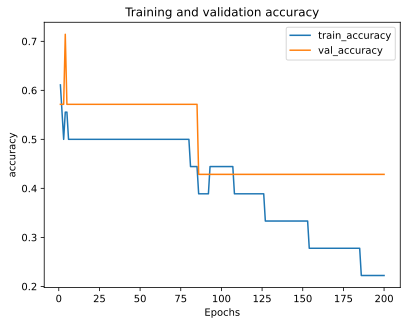

In [55]:
plot_metric(history, 'accuracy')

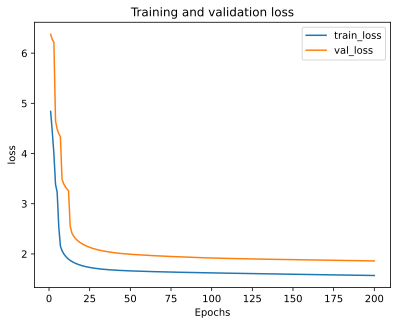

In [56]:
plot_metric(history, 'loss')

In [53]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test, verbose=2)

2/2 - 0s - loss: 1.8482 - accuracy: 0.5429 - 24ms/epoch - 12ms/step


[1.8481781482696533, 0.5428571701049805]

In [90]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

def create_regularized_model(factor, rate):
    model = Sequential([
        Dense(64, activity_regularizer=l1(factor), activation="linear", input_shape=(2,)),
        Dropout(rate),
        Dense(32, activation="relu"),
        Dropout(rate),
        Dense(16,  activation="relu"),
        Dropout(rate),
        Dense(1, activation='sigmoid')

    ])
    return model

In [115]:
# Re-build the model with weight decay and dropout layers
model = create_regularized_model(1e-2, 0.5)

In [116]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 64)                192       
                                                                 
 dropout_29 (Dropout)        (None, 64)                0         
                                                                 
 dense_47 (Dense)            (None, 32)                2080      
                                                                 
 dropout_30 (Dropout)        (None, 32)                0         
                                                                 
 dense_48 (Dense)            (None, 16)                528       
                                                                 
 dropout_31 (Dropout)        (None, 16)                0         
                                                                 
 dense_49 (Dense)            (None, 1)               

In [117]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
    )

In [118]:
# Train the model, with some of the data reserved for validation
history = model.fit(
    X_train,
    y_train,
    epochs=200,
    validation_split=0.25,
    batch_size=40,
    verbose=2
)

Epoch 1/200
1/1 - 1s - loss: 0.7850 - accuracy: 0.6111 - val_loss: 0.7938 - val_accuracy: 0.4286 - 1s/epoch - 1s/step
Epoch 2/200
1/1 - 0s - loss: 0.8453 - accuracy: 0.3889 - val_loss: 0.7923 - val_accuracy: 0.4286 - 35ms/epoch - 35ms/step
Epoch 3/200
1/1 - 0s - loss: 0.7771 - accuracy: 0.5556 - val_loss: 0.7909 - val_accuracy: 0.4286 - 34ms/epoch - 34ms/step
Epoch 4/200
1/1 - 0s - loss: 0.8103 - accuracy: 0.5000 - val_loss: 0.7901 - val_accuracy: 0.4286 - 31ms/epoch - 31ms/step
Epoch 5/200
1/1 - 0s - loss: 0.7087 - accuracy: 0.6667 - val_loss: 0.7894 - val_accuracy: 0.4286 - 38ms/epoch - 38ms/step
Epoch 6/200
1/1 - 0s - loss: 0.7973 - accuracy: 0.4444 - val_loss: 0.7886 - val_accuracy: 0.4286 - 33ms/epoch - 33ms/step
Epoch 7/200
1/1 - 0s - loss: 0.8916 - accuracy: 0.3333 - val_loss: 0.7880 - val_accuracy: 0.4286 - 55ms/epoch - 55ms/step
Epoch 8/200
1/1 - 0s - loss: 0.7031 - accuracy: 0.7222 - val_loss: 0.7875 - val_accuracy: 0.4286 - 36ms/epoch - 36ms/step
Epoch 9/200
1/1 - 0s - loss:

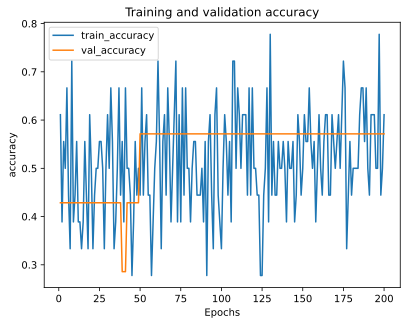

In [119]:
plot_metric(history, 'accuracy')

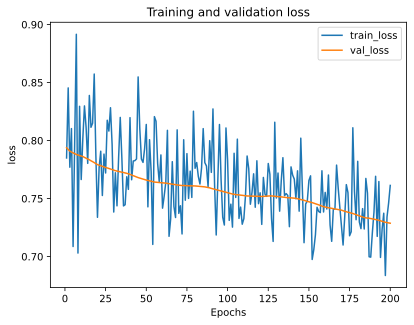

In [120]:
plot_metric(history, 'loss')

In [69]:
#The weight regularization layer of keras is applying penalties to the parameters of layers. The weight regularization layer will expose three keyword arguments as follows:
#Kernel Regularizer
#Bias Regularizer
#Activity Regularizer

